<a href="https://colab.research.google.com/github/GustavoLSantos/LearningMachineLearning/blob/main/2DTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)
data.head()

#In this block we're reading a CSV file that contains the amount of unfinished websites, the expected hours for it to finish and the price the client was able to pay.

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
change = {
    0 : 1,
    1 : 0
}

data['finished'] = data.unfinished.map(change)
print(data)

      unfinished  expected_hours  price  finalizado  finished
0              1              26    192           0         0
1              1              88   9015           0         0
2              1              89   2577           0         0
3              1              42    275           0         0
4              1              39    170           0         0
...          ...             ...    ...         ...       ...
2152           0              80   7518           1         1
2153           1              52   1332           0         0
2154           0              40    473           1         1
2155           0              75   5324           1         1
2156           1              37    377           0         0

[2157 rows x 5 columns]


<Axes: xlabel='expected_hours', ylabel='price'>

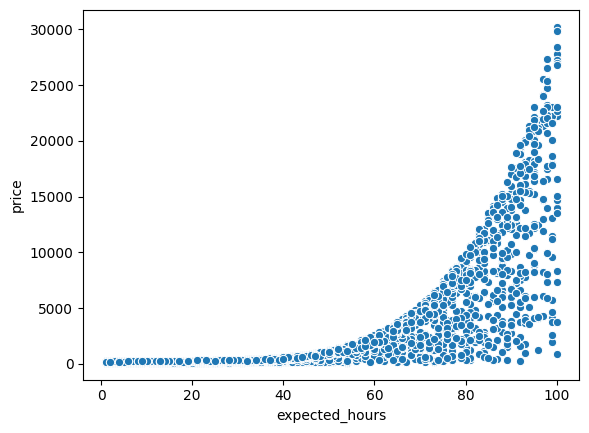

In [ ]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", data=data)

#In this first chart we have the expected_hours (x) by the price (y)

<Axes: xlabel='expected_hours', ylabel='price'>

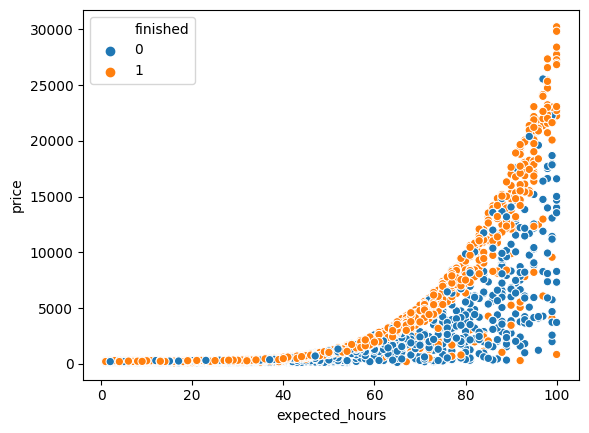

In [ ]:
sns.scatterplot(x="expected_hours", y="price", hue="finished",data=data)

#In this second chart we have the expected_hours (x) by the price (y) with the hue of the finished ones, and we can clearly see that the finished websites tend to form a more defined curve of price and hours than the unfinished ones

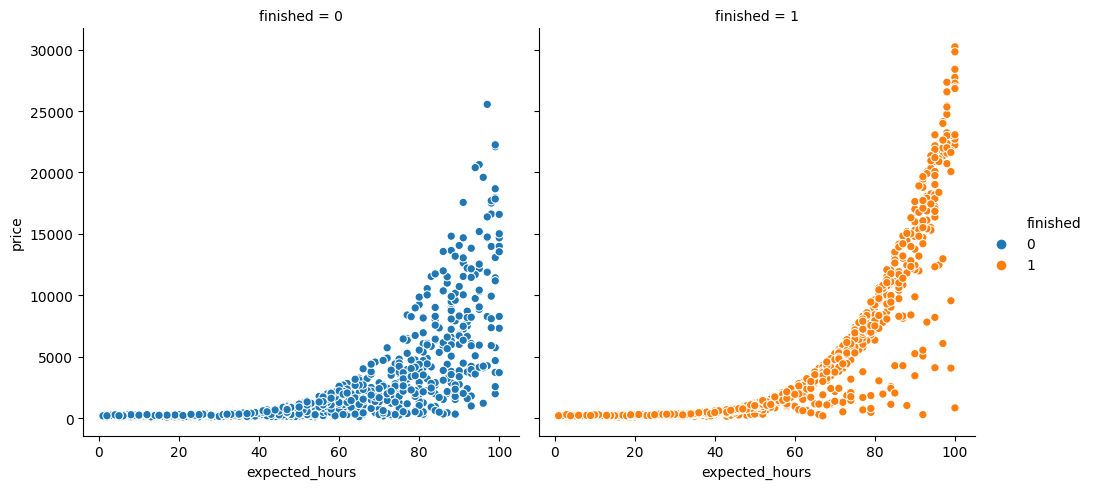

In [ ]:
sns.relplot(x="expected_hours", y="price", hue="finished", col="finished",data=data)

In [ ]:
x = data[['expected_hours', 'price']]
y = data['finished']

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("We'll train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC(gamma='auto')
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy rate is %.2f%%" % accuracy)


We'll train with 1617 elements and test with 540 elements
The accuracy rate is 66.85%


In [94]:
base_predictions = np.ones(540)
accuracy = accuracy_score(test_y, base_predictions) * 100
print("The accuracy rate of the baseline predictions is %.2f%%" % accuracy)

#This block proves that currently the machine prediction is no better than 540 ones, it's actually the same exactly accuracy_rate

The accuracy rate of the baseline predictions is 52.59%


In [100]:
data_x = test_x[:,0]
data_y = test_x[:,1]

min_expected_hours = data_x.min()
max_expected_hours = data_x.max()
min_price = data_y.min()
max_price = data_y.max()

print(min_expected_hours, max_expected_hours, min_price, max_price)
#Here we define the min and max of both axis so we can create a mesh

-1.7348767953644189 1.7418048354450535 -0.5962799114048444 5.406738368968601


In [101]:
pixels = 100
x_axis = np.arange(min_expected_hours, max_expected_hours, (max_expected_hours - min_expected_hours) / pixels)
y_axis = np.arange(min_price, max_price, (max_price - min_price) / pixels)
#Here we define the amount of pixels the mesh will have and then return in each axis the evenly spaced values within the (max - min) interval divided by the amount of pixels

In [102]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[-1.7348768 , -0.59627991],
       [-1.70010998, -0.59627991],
       [-1.66534316, -0.59627991],
       ...,
       [ 1.63750439,  5.34670819],
       [ 1.6722712 ,  5.34670819],
       [ 1.70703802,  5.34670819]])

In [103]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z

#Here we reshape the Z (that has 10000 points, which are the axis values compressed into a 1-D array) into the xx (Which has 100 points, that is the x axis)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

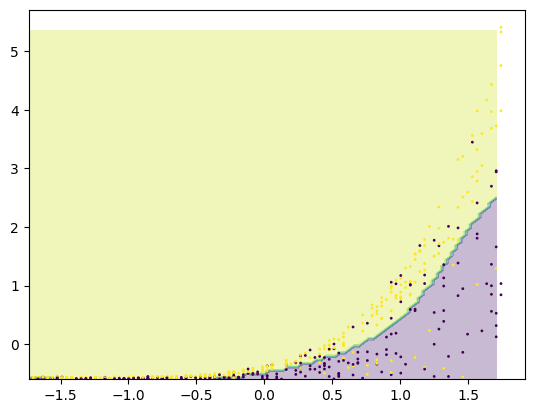

In [104]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)

#Decision Boundary -> Since a Linear lib has been used, the algorithm can only reproduce straight lines, therefore, it's not able to exhibit the curve of price and expected hours.
#These graphics are very sensible to scale. In this case we have the x with a 0 - 100 scale and the y with 0 - 30000, and because of that the algorithm makes more mistakes. We should rescale both axis if that's the case.